# 통계분석

In [1]:
import pandas as pd
import numpy as np
import mglearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot

## 1. 회귀분석

(1) 데이터를 8 : 2로 분핧하고 선형 회귀를 적용하시오. 결정계수와 rmse를 구하시오.

In [2]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 526)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(404, 104) (102, 104)
(404,) (102,)


In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [4]:
print('선형 회귀 결정계수: ', lr.score(X_test, y_test))
print('선형 회귀 RMSE: ', np.sqrt(mean_absolute_error(y_test, lr.predict(X_test))))

선형 회귀 결정계수:  0.8193717034535019
선형 회귀 RMSE:  1.5988396013880941


(2) 데이터를 8 : 2로 분할하고 릿지 회귀를 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을 때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

In [5]:
alpha = np.arange(0, 1, 0.1)

ridge_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

param_grid = {'ridge__alpha': alpha}
ridge_model = GridSearchCV(ridge_pipeline, param_grid, cv = 5)
ridge_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [6]:
print(ridge_model.best_params_)
print('릿지 회귀 결정계수: ', ridge_model.score(X_test, y_test))
print('릿지 회귀 RMSE: ', np.sqrt(mean_absolute_error(y_test, ridge_model.predict(X_test))))

{'ridge__alpha': np.float64(0.30000000000000004)}
릿지 회귀 결정계수:  0.8427569024217281
릿지 회귀 RMSE:  1.5502601467443717


(3) 데이터를 8 : 2로 분할하고 라쏘 회귀를 적용하시오. alpha 값을 0부터 1까지 0.1단위로 모두 탐색해서 결정계수가 가장 높을  때의 알파를 찾고, 해당 알파로 다시 모델을 학습해서 결정계수와 rmse를 계산하시오.

In [7]:
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

param_grid = {'lasso__alpha': alpha}
lasso_model = GridSearchCV(lasso_pipeline, param_grid, cv = 5)
lasso_model.fit(X_train, y_train)

/home/ubuntu/work_space/adp_hands_on/.adp_hands_on/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/ubuntu/work_space/adp_hands_on/.adp_hands_on/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/ubuntu/work_space/adp_hands_on/.adp_hands_on/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.779e+02, tolerance: 2.956e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             param_grid={'lasso__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [8]:
print(lasso_model.best_params_)
print('라쏘 회귀 결정계수: ', lasso_model.best_estimator_.score(X_test, y_test))
print(
    '라쏘 회귀 RMSE: ',
    np.sqrt(mean_absolute_error(y_test, lasso_model.best_estimator_.predict(X_test)))
)

{'lasso__alpha': np.float64(0.0)}
라쏘 회귀 결정계수:  0.820278934993071
라쏘 회귀 RMSE:  1.6034299691386023


## 2. 다항 회귀분석 시각화

아래와 같은 단순 선형 회귀를 다항 회귀로 3차까지 적용시켜 계수를 구하고 3차항을 적용한 모델의 스캐터 플롯과 기울기 선을 그리시오.

In [9]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 3 * X ** 3 + X ** 2 + 2 * X + 2 + np.random.randn(m, 1)
line = np.linspace(-3, 3, 100, endpoint = False).reshape(-1, 1)

In [10]:
poly = PolynomialFeatures(degree = 3, include_bias= False)
poly.fit(X)
X_poly = poly.transform(X)
line_poly = poly.transform(line)
reg = LinearRegression().fit(X_poly, y)

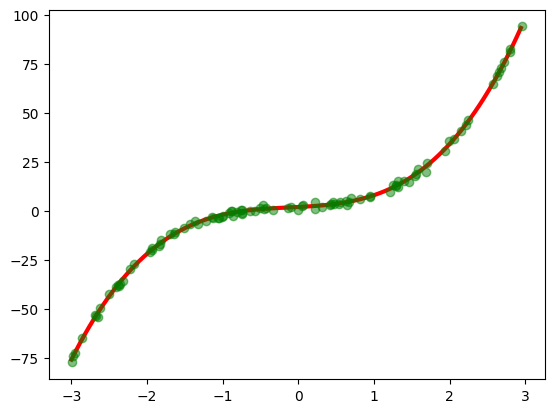

In [11]:
plt.plot(line, reg.predict(line_poly), c = 'r', linewidth = 3)
plt.plot(X, y, 'o', c = 'g', alpha = 0.5)
plt.show()

## 3. ANOVA 분석

변수 3개(하나는 범주형 변수 / 나머지 두 개는 수치형 연속변수)의 이원분산분석을 수행하고 통계표를 작성하시오.

In [12]:
data_path = '/hdd/data/adp_data/avocado.csv'
avocado = pd.read_csv(data_path, index_col = 0)
avocado = avocado[['AveragePrice', 'type', 'region']]
avocado = avocado[
    avocado['region'].isin(['Orlando', 'Boston', 'Chicago'])
].reset_index(drop = True)

In [13]:
print(avocado.shape)
avocado.head()

(1014, 3)


,AveragePrice,type,region
0,1.13,conventional,Boston
1,1.07,conventional,Boston
2,1.01,conventional,Boston
3,1.02,conventional,Boston
4,1.19,conventional,Boston


In [ ]:
AveragePrice = avocado['AveragePrice']
avocado_type = avocado['type']
region = avocado['region']

formula = 'AveragePrice ~ C(avocado_type) * C(region)'
model = ols(formula, avocado).fit()
aov_table = anova_lm(model, typ = 2)
aov_table

,sum_sq,df,F,PR(>F)
C(avocado_type),56.111007,1.0,828.218296,1.989417e-133
C(region),0.432136,2.0,3.189242,4.161918e-02
C(avocado_type):C(region),1.878817,2.0,13.866003,1.146622e-06
Residual,68.291047,1008.0,NaN,NaN


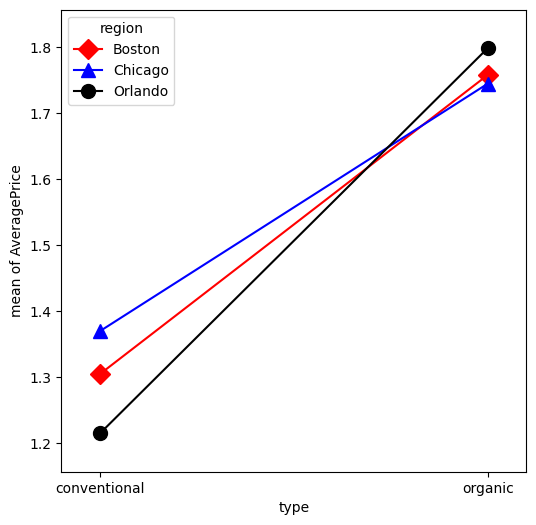

In [16]:
fig, ax = plt.subplots(figsize = (6, 6))
fig = interaction_plot(
    avocado_type,
    region,
    AveragePrice,
    colors = ['red', 'blue', 'black'],
    markers = ['D', '^', 'o'],
    ms = 10,
    ax = ax
)